In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
t_data=pd.read_csv('C:\\Users\\rohit.desai.ACS\OneDrive - Innova Solutions\Documents\Fraud\Train_datasets\Train-1542865627584.csv')
train_bendata=pd.read_csv('C:\\Users\\rohit.desai.ACS\OneDrive - Innova Solutions\Documents\Fraud\Train_datasets\Train_Beneficiarydata-1542865627584.csv')
train_inpdata=pd.read_csv('C:\\Users\\rohit.desai.ACS\OneDrive - Innova Solutions\Documents\Fraud\Train_datasets\Train_Inpatientdata-1542865627584.csv')
train_outpdata=pd.read_csv('C:\\Users\\rohit.desai.ACS\OneDrive - Innova Solutions\Documents\Fraud\Train_datasets\Train_Outpatientdata-1542865627584.csv')

In [3]:
'''df = t_data.merge(train_inpdata, how = 'left', on = 'Provider')
df = df.merge(train_outpdata, how = 'left', on = ['Provider', 'BeneID', 'ClaimID'])
df = df.merge(train_bendata, how = 'left', on = 'BeneID')

df'''



"df = t_data.merge(train_inpdata, how = 'left', on = 'Provider')\ndf = df.merge(train_outpdata, how = 'left', on = ['Provider', 'BeneID', 'ClaimID'])\ndf = df.merge(train_bendata, how = 'left', on = 'BeneID')\n\ndf"

Merging Datasets and Cleaning Data

In [4]:
df = t_data.merge(train_outpdata, how = 'left', on = 'Provider')
df = df.merge(train_inpdata, how = 'left', on = ['Provider', 'BeneID', 'ClaimID'])
df = df.merge(train_bendata, how = 'left', on = 'BeneID')

df

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NaN,PHY383007,...,2.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,300.0,110.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NaN,PHY402512,...,2.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,720.0,10.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NaN,NaN,...,2.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,1380.0,370.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NaN,...,1.0,1.0,1.0,2.0,2.0,2.0,2020.0,1068.0,6700.0,2700.0
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NaN,NaN,...,2.0,2.0,1.0,1.0,2.0,2.0,5000.0,1068.0,370.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1780.0,320.0
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,200.0,200.0
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,2.0,1.0,1.0,2.0,2.0,2.0,28150.0,2136.0,1980.0,500.0
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NaN,PHY321072,...,2.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,3700.0,240.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518135 entries, 0 to 518134
Data columns (total 79 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         518135 non-null  object 
 1   PotentialFraud                   518135 non-null  object 
 2   BeneID                           517737 non-null  object 
 3   ClaimID                          517737 non-null  object 
 4   ClaimStartDt_x                   517737 non-null  object 
 5   ClaimEndDt_x                     517737 non-null  object 
 6   InscClaimAmtReimbursed_x         517737 non-null  float64
 7   AttendingPhysician_x             516341 non-null  object 
 8   OperatingPhysician_x             90617 non-null   object 
 9   OtherPhysician_x                 195046 non-null  object 
 10  ClmDiagnosisCode_1_x             507284 non-null  object 
 11  ClmDiagnosisCode_2_x             322357 non-null  object 
 12  Cl

In [6]:
df=df[~df['BeneID'].isna()]
df

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NaN,PHY383007,...,2.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,300.0,110.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NaN,PHY402512,...,2.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,720.0,10.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NaN,NaN,...,2.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,1380.0,370.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NaN,...,1.0,1.0,1.0,2.0,2.0,2.0,2020.0,1068.0,6700.0,2700.0
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NaN,NaN,...,2.0,2.0,1.0,1.0,2.0,2.0,5000.0,1068.0,370.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1780.0,320.0
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,200.0,200.0
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,2.0,1.0,1.0,2.0,2.0,2.0,28150.0,2136.0,1980.0,500.0
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NaN,PHY321072,...,2.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,3700.0,240.0


In [7]:
df=df.drop(['ClaimStartDt_y','ClaimEndDt_y','InscClaimAmtReimbursed_y','AttendingPhysician_y','OperatingPhysician_y','OtherPhysician_y','ClmAdmitDiagnosisCode_y','DeductibleAmtPaid_y','ClmDiagnosisCode_1_y','ClmDiagnosisCode_2_y','ClmDiagnosisCode_3_y','ClmDiagnosisCode_4_y','ClmDiagnosisCode_5_y','ClmDiagnosisCode_6_y','ClmDiagnosisCode_7_y','ClmDiagnosisCode_8_y','ClmDiagnosisCode_9_y','ClmDiagnosisCode_10_y','ClmProcedureCode_1_y','ClmProcedureCode_2_y','ClmProcedureCode_3_y','ClmProcedureCode_4_y','ClmProcedureCode_5_y','ClmProcedureCode_6_y','AdmissionDt','DischargeDt','DeductibleAmtPaid_y','DiagnosisGroupCode'],axis=1)
df

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NaN,PHY383007,...,2.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,300.0,110.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NaN,PHY402512,...,2.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,720.0,10.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NaN,NaN,...,2.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,1380.0,370.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NaN,...,1.0,1.0,1.0,2.0,2.0,2.0,2020.0,1068.0,6700.0,2700.0
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NaN,NaN,...,2.0,2.0,1.0,1.0,2.0,2.0,5000.0,1068.0,370.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1780.0,320.0
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,200.0,200.0
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,2.0,1.0,1.0,2.0,2.0,2.0,28150.0,2136.0,1980.0,500.0
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NaN,PHY321072,...,2.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,3700.0,240.0


In [8]:
df[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']]=df[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].replace(np.nan,0)


In [9]:
df[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x','ClmProcedureCode_6_x']]=df[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x','ClmProcedureCode_6_x']].replace(np.nan,0)
#df['DOD']=df['DOD'].replace(np.nan,'NA')
df['ClmAdmitDiagnosisCode_x']=df['ClmAdmitDiagnosisCode_x'].replace(np.nan,0)



In [10]:
df[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']]=df[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].replace(np.nan,'NA')

In [11]:
a=dict(df.isna().sum())
a

{'Provider': 0,
 'PotentialFraud': 0,
 'BeneID': 0,
 'ClaimID': 0,
 'ClaimStartDt_x': 0,
 'ClaimEndDt_x': 0,
 'InscClaimAmtReimbursed_x': 0,
 'AttendingPhysician_x': 0,
 'OperatingPhysician_x': 0,
 'OtherPhysician_x': 0,
 'ClmDiagnosisCode_1_x': 0,
 'ClmDiagnosisCode_2_x': 0,
 'ClmDiagnosisCode_3_x': 0,
 'ClmDiagnosisCode_4_x': 0,
 'ClmDiagnosisCode_5_x': 0,
 'ClmDiagnosisCode_6_x': 0,
 'ClmDiagnosisCode_7_x': 0,
 'ClmDiagnosisCode_8_x': 0,
 'ClmDiagnosisCode_9_x': 0,
 'ClmDiagnosisCode_10_x': 0,
 'ClmProcedureCode_1_x': 0,
 'ClmProcedureCode_2_x': 0,
 'ClmProcedureCode_3_x': 0,
 'ClmProcedureCode_4_x': 0,
 'ClmProcedureCode_5_x': 0,
 'ClmProcedureCode_6_x': 0,
 'DeductibleAmtPaid_x': 0,
 'ClmAdmitDiagnosisCode_x': 0,
 'DOB': 0,
 'DOD': 513924,
 'Gender': 0,
 'Race': 0,
 'RenalDiseaseIndicator': 0,
 'State': 0,
 'County': 0,
 'NoOfMonths_PartACov': 0,
 'NoOfMonths_PartBCov': 0,
 'ChronicCond_Alzheimer': 0,
 'ChronicCond_Heartfailure': 0,
 'ChronicCond_KidneyDisease': 0,
 'ChronicCond_C

EDA

In [12]:

#dfy=df[df['PotentialFraud']=='Yes']

In [13]:
'''plt.bar(round(df['PotentialFraud'].value_counts(normalize=True)*100,2).index,round(df['PotentialFraud'].value_counts(normalize=True)*100,2))
plt.title('% of Yes & No in Potential Fraud ')
plt.ylabel('Percentage')'''


"plt.bar(round(df['PotentialFraud'].value_counts(normalize=True)*100,2).index,round(df['PotentialFraud'].value_counts(normalize=True)*100,2))\nplt.title('% of Yes & No in Potential Fraud ')\nplt.ylabel('Percentage')"

In [14]:
len(df['Provider'].unique())

5012

In [15]:
'''plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
p=sns.barplot(x=df[df['PotentialFraud']=='Yes']['Provider'].value_counts().head().index,y=df[df['PotentialFraud']=='Yes']['Provider'].value_counts().head())
plt.xlabel('Provider')
plt.ylabel('Count')
plt.bar_label(p.containers[0])
plt.title('Top 5 Fraudulent Heathcare Providers ')

plt.subplot(1,2,2)
p=sns.barplot(x=dfy.groupby(by='Provider')['InscClaimAmtReimbursed_x'].sum().sort_values(ascending=False).head().index,y=dfy.groupby(by='Provider')['InscClaimAmtReimbursed_x'].sum().sort_values(ascending=False).head())
plt.xlabel('Provider')
plt.ylabel('Count')
plt.bar_label(p.containers[0])
plt.title('Top 5 Fraudulent Heathcare Providers by Amount ')'''

"plt.figure(figsize=(15,10))\nplt.subplot(1,2,1)\np=sns.barplot(x=df[df['PotentialFraud']=='Yes']['Provider'].value_counts().head().index,y=df[df['PotentialFraud']=='Yes']['Provider'].value_counts().head())\nplt.xlabel('Provider')\nplt.ylabel('Count')\nplt.bar_label(p.containers[0])\nplt.title('Top 5 Fraudulent Heathcare Providers ')\n\nplt.subplot(1,2,2)\np=sns.barplot(x=dfy.groupby(by='Provider')['InscClaimAmtReimbursed_x'].sum().sort_values(ascending=False).head().index,y=dfy.groupby(by='Provider')['InscClaimAmtReimbursed_x'].sum().sort_values(ascending=False).head())\nplt.xlabel('Provider')\nplt.ylabel('Count')\nplt.bar_label(p.containers[0])\nplt.title('Top 5 Fraudulent Heathcare Providers by Amount ')"

In [16]:
'''plt.figure(figsize=(10,15))
plt.subplot(2,2,1)
p=sns.barplot(x=df[df['PotentialFraud']=='Yes']['AttendingPhysician_x'].value_counts().head().index,y=df[df['PotentialFraud']=='Yes']['AttendingPhysician_x'].value_counts().head())
plt.xlabel('Attending Physician')
plt.ylabel('Count')
plt.title('Top 5 Attending Physicians for Fraudulent claims')
plt.xticks(rotation=30)
plt.bar_label(p.containers[0])

plt.subplot(2,2,2)
p=sns.barplot(x=df[df['PotentialFraud']=='Yes']['OperatingPhysician_x'].value_counts()[1:6].index,y=df[df['PotentialFraud']=='Yes']['OperatingPhysician_x'].value_counts()[1:6])
plt.xlabel('Operating Physician')
plt.ylabel('Count')
plt.title('Top 5 Operating Physicians for Fraudulent claims')
plt.xticks(rotation=30)
plt.bar_label(p.containers[0])

plt.subplot(2,2,3)
p=sns.barplot(x=df[df['PotentialFraud']=='Yes']['OtherPhysician_x'].value_counts()[1:6].index,y=df[df['PotentialFraud']=='Yes']['OtherPhysician_x'].value_counts()[1:6])
plt.xlabel('Other Physician')
plt.ylabel('Count')
plt.title('Top 5 Other Physicians for Fraudulent claims')
plt.xticks(rotation=30)
plt.bar_label(p.containers[0])'''

"plt.figure(figsize=(10,15))\nplt.subplot(2,2,1)\np=sns.barplot(x=df[df['PotentialFraud']=='Yes']['AttendingPhysician_x'].value_counts().head().index,y=df[df['PotentialFraud']=='Yes']['AttendingPhysician_x'].value_counts().head())\nplt.xlabel('Attending Physician')\nplt.ylabel('Count')\nplt.title('Top 5 Attending Physicians for Fraudulent claims')\nplt.xticks(rotation=30)\nplt.bar_label(p.containers[0])\n\nplt.subplot(2,2,2)\np=sns.barplot(x=df[df['PotentialFraud']=='Yes']['OperatingPhysician_x'].value_counts()[1:6].index,y=df[df['PotentialFraud']=='Yes']['OperatingPhysician_x'].value_counts()[1:6])\nplt.xlabel('Operating Physician')\nplt.ylabel('Count')\nplt.title('Top 5 Operating Physicians for Fraudulent claims')\nplt.xticks(rotation=30)\nplt.bar_label(p.containers[0])\n\nplt.subplot(2,2,3)\np=sns.barplot(x=df[df['PotentialFraud']=='Yes']['OtherPhysician_x'].value_counts()[1:6].index,y=df[df['PotentialFraud']=='Yes']['OtherPhysician_x'].value_counts()[1:6])\nplt.xlabel('Other Physic

In [17]:
lst=['ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
'ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']

In [18]:

'''dfy['month']=[i.month for i in pd.to_datetime(dfy['ClaimStartDt_x'])]
dfy['year']=[i.year for i in pd.to_datetime(dfy['ClaimStartDt_x'])]
dfy'''

"dfy['month']=[i.month for i in pd.to_datetime(dfy['ClaimStartDt_x'])]\ndfy['year']=[i.year for i in pd.to_datetime(dfy['ClaimStartDt_x'])]\ndfy"

In [19]:
df

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,2.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,300.0,110.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,2.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,720.0,10.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,2.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,1380.0,370.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,1.0,1.0,1.0,2.0,2.0,2.0,2020.0,1068.0,6700.0,2700.0
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,2.0,2.0,1.0,1.0,2.0,2.0,5000.0,1068.0,370.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1780.0,320.0
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,200.0,200.0
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,2.0,1.0,1.0,2.0,2.0,2.0,28150.0,2136.0,1980.0,500.0
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,2.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,3700.0,240.0


In [20]:
df['DOB']=pd.to_datetime(df['DOB'],format='%Y-%m-%d')
df['DOD']=pd.to_datetime(df['DOD'],format='%Y-%m-%d')
df['DOD'].fillna(df['DOD'].max(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517737 entries, 0 to 518134
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Provider                         517737 non-null  object        
 1   PotentialFraud                   517737 non-null  object        
 2   BeneID                           517737 non-null  object        
 3   ClaimID                          517737 non-null  object        
 4   ClaimStartDt_x                   517737 non-null  object        
 5   ClaimEndDt_x                     517737 non-null  object        
 6   InscClaimAmtReimbursed_x         517737 non-null  float64       
 7   AttendingPhysician_x             517737 non-null  object        
 8   OperatingPhysician_x             517737 non-null  object        
 9   OtherPhysician_x                 517737 non-null  object        
 10  ClmDiagnosisCode_1_x             517737 non-

In [21]:
df['ClaimStartDt_x']=pd.to_datetime(df['ClaimStartDt_x'],format='%Y-%m-%d')
df['ClaimEndDt_x']=pd.to_datetime(df['ClaimEndDt_x'],format='%Y-%m-%d')
df['Claim_Duration']=(df['ClaimEndDt_x']-df['ClaimStartDt_x']).dt.days


In [22]:
df['B_Age']=round(((df['DOD']-df['DOB']).dt.days)/365,1)

In [23]:
# df is the dataframe, a='ClaimID',x= Attending Physician, y=Operating Physician, z=Other Physician


def AllPhy_totClaims(df,a,x,y,z):
    df['AttPhy_TC']=df.groupby(x)[a].transform('count')
    df['OptPhy_TC']=df.groupby(y)[a].transform('count')
    df['OthPhy_TC']=df.groupby(z)[a].transform('count')
    df['AttPhy_TC'].fillna(0,inplace=True)
    df['OptPhy_TC'].fillna(0,inplace=True)
    df['OthPhy_TC'].fillna(0,inplace=True)
    df['AllPhy_totClaims'] = df['AttPhy_TC']+df['OptPhy_TC']+df['OthPhy_TC']
    df.drop(['AttPhy_TC','OptPhy_TC','OthPhy_TC'],axis=1,inplace=True)
    return df


AllPhy_totClaims(df,'ClaimID','AttendingPhysician_x','OperatingPhysician_x','OtherPhysician_x')

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Duration,B_Age,AllPhy_totClaims
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,2.0,2.0,2.0,0.0,0.0,300.0,110.0,0,79.6,427122
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,1.0,2.0,1.0,0.0,0.0,720.0,10.0,1,66.8,427125
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,2.0,1.0,2.0,0.0,0.0,1380.0,370.0,0,76.4,749815
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,2.0,2.0,2.0,2020.0,1068.0,6700.0,2700.0,1,73.8,322693
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,1.0,2.0,2.0,5000.0,1068.0,370.0,70.0,0,90.6,749814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,1.0,1.0,2.0,0.0,0.0,1780.0,320.0,9,69.9,186
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,2.0,2.0,2.0,0.0,0.0,200.0,200.0,0,51.0,749929
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,2.0,2.0,2.0,28150.0,2136.0,1980.0,500.0,0,46.4,186
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,2.0,2.0,2.0,0.0,0.0,3700.0,240.0,0,57.9,427287


In [24]:
#Provider and all physicians interaction

 

#df is dataframe, a=Provider, x=Attending Physician, y=Operating Physician, z= Other Physician

 

def Prvd_AllPhy(df,a,x,y,z):
    df['Prvd_AttPhy']=df.groupby(a)[x].transform('count')
    df['Prvd_OptPhy']=df.groupby(a)[y].transform('count')
    df['Prvd_OthPhy']=df.groupby(a)[z].transform('count')
    df['Prvd_AllPhy']=df['Prvd_AttPhy']+df['Prvd_OptPhy']+df['Prvd_OthPhy']
    df.drop(['Prvd_AttPhy','Prvd_OptPhy','Prvd_OthPhy'],axis=1,inplace=True)
    return df

 


Prvd_AllPhy(df,'Provider','AttendingPhysician_x','OperatingPhysician_x','OtherPhysician_x')
    

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Duration,B_Age,AllPhy_totClaims,Prvd_AllPhy
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,2.0,2.0,0.0,0.0,300.0,110.0,0,79.6,427122,60
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,2.0,1.0,0.0,0.0,720.0,10.0,1,66.8,427125,60
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,1.0,2.0,0.0,0.0,1380.0,370.0,0,76.4,749815,60
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,2.0,2.0,2020.0,1068.0,6700.0,2700.0,1,73.8,322693,60
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,2.0,2.0,5000.0,1068.0,370.0,70.0,0,90.6,749814,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,1.0,2.0,0.0,0.0,1780.0,320.0,9,69.9,186,354
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,2.0,2.0,0.0,0.0,200.0,200.0,0,51.0,749929,354
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,2.0,2.0,28150.0,2136.0,1980.0,500.0,0,46.4,186,354
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,2.0,2.0,0.0,0.0,3700.0,240.0,0,57.9,427287,354


In [25]:
# Unique claim diagnosis used by providers


#df is dataframe, a=provider, x= claimadmitdiagnosiscode,

def Pvrd_CADC(df,a,x):
    df['Pvrd_CADC']=df.groupby(a)[x].transform('nunique')
    return df


Pvrd_CADC(df,'Provider','ClmAdmitDiagnosisCode_x')


,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Duration,B_Age,AllPhy_totClaims,Prvd_AllPhy,Pvrd_CADC
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,2.0,0.0,0.0,300.0,110.0,0,79.6,427122,60,7
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,1.0,0.0,0.0,720.0,10.0,1,66.8,427125,60,7
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,2.0,0.0,0.0,1380.0,370.0,0,76.4,749815,60,7
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,2.0,2020.0,1068.0,6700.0,2700.0,1,73.8,322693,60,7
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,2.0,5000.0,1068.0,370.0,70.0,0,90.6,749814,60,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,2.0,0.0,0.0,1780.0,320.0,9,69.9,186,354,19
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,2.0,0.0,0.0,200.0,200.0,0,51.0,749929,354,19
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,2.0,28150.0,2136.0,1980.0,500.0,0,46.4,186,354,19
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,2.0,0.0,0.0,3700.0,240.0,0,57.9,427287,354,19


In [26]:
#Sum of Insc Claim Re-Imb Amount for a Provider

#df is dataframe, a= provider,x=Insurance claim amt reinmbursed

def Pvrd_InsClnReimAmt(df,a,x):
    df['Pvrd_InsClnReimAmt']=df.groupby(a)[x].transform('sum')
    return df

Pvrd_InsClnReimAmt(df,'Provider','InscClaimAmtReimbursed_x')

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Duration,B_Age,AllPhy_totClaims,Prvd_AllPhy,Pvrd_CADC,Pvrd_InsClnReimAmt
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,0.0,0.0,300.0,110.0,0,79.6,427122,60,7,7640.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,0.0,0.0,720.0,10.0,1,66.8,427125,60,7,7640.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,0.0,0.0,1380.0,370.0,0,76.4,749815,60,7,7640.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,2020.0,1068.0,6700.0,2700.0,1,73.8,322693,60,7,7640.0
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,5000.0,1068.0,370.0,70.0,0,90.6,749814,60,7,7640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,0.0,0.0,1780.0,320.0,9,69.9,186,354,19,43610.0
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,0.0,0.0,200.0,200.0,0,51.0,749929,354,19,43610.0
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,28150.0,2136.0,1980.0,500.0,0,46.4,186,354,19,43610.0
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,0.0,0.0,3700.0,240.0,0,57.9,427287,354,19,43610.0


In [27]:
df['RenalDiseaseIndicator'].replace({0:0,'Y':1},inplace=True)
df['RenalDiseaseIndicator']=df['RenalDiseaseIndicator'].astype('int')

#renal disease indicator seen by provider
#df is dataframe, a= provider,x=renal disease indicator
def Pvrd_RDI(df,a,x):
    df['Pvrd_RDI']=df.groupby(a)[x].transform('sum')
    return df

Pvrd_RDI(df,'Provider','RenalDiseaseIndicator')

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Duration,B_Age,AllPhy_totClaims,Prvd_AllPhy,Pvrd_CADC,Pvrd_InsClnReimAmt,Pvrd_RDI
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,0.0,300.0,110.0,0,79.6,427122,60,7,7640.0,6
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,0.0,720.0,10.0,1,66.8,427125,60,7,7640.0,6
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,0.0,1380.0,370.0,0,76.4,749815,60,7,7640.0,6
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,1068.0,6700.0,2700.0,1,73.8,322693,60,7,7640.0,6
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,1068.0,370.0,70.0,0,90.6,749814,60,7,7640.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,0.0,1780.0,320.0,9,69.9,186,354,19,43610.0,25
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,0.0,200.0,200.0,0,51.0,749929,354,19,43610.0,25
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,2136.0,1980.0,500.0,0,46.4,186,354,19,43610.0,25
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,0.0,3700.0,240.0,0,57.9,427287,354,19,43610.0,25


In [28]:

#df is dataframe, a= provider,x=deductible amount paid
def Pvrd_DedAmtPaid(df,a,x):
    df['Pvrd_DedAmtPaid']=df.groupby(a)[x].transform('sum')
    return df
Pvrd_DedAmtPaid(df,'Provider','DeductibleAmtPaid_x')

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Duration,B_Age,AllPhy_totClaims,Prvd_AllPhy,Pvrd_CADC,Pvrd_InsClnReimAmt,Pvrd_RDI,Pvrd_DedAmtPaid
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,300.0,110.0,0,79.6,427122,60,7,7640.0,6,0.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,720.0,10.0,1,66.8,427125,60,7,7640.0,6,0.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,1380.0,370.0,0,76.4,749815,60,7,7640.0,6,0.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,6700.0,2700.0,1,73.8,322693,60,7,7640.0,6,0.0
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,370.0,70.0,0,90.6,749814,60,7,7640.0,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,1780.0,320.0,9,69.9,186,354,19,43610.0,25,390.0
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,200.0,200.0,0,51.0,749929,354,19,43610.0,25,390.0
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,1980.0,500.0,0,46.4,186,354,19,43610.0,25,390.0
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,3700.0,240.0,0,57.9,427287,354,19,43610.0,25,390.0


In [29]:
#df is dataframe, a= provider,x= IP annual amt reimbursement
def Pvrd_IPAnAmtReim(df,a,x):
    df['Pvrd_IPAnAmtReim']=df.groupby(a)[x].transform('sum')
    return df
Pvrd_IPAnAmtReim(df,'Provider','IPAnnualReimbursementAmt')

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,OPAnnualDeductibleAmt,Claim_Duration,B_Age,AllPhy_totClaims,Prvd_AllPhy,Pvrd_CADC,Pvrd_InsClnReimAmt,Pvrd_RDI,Pvrd_DedAmtPaid,Pvrd_IPAnAmtReim
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,110.0,0,79.6,427122,60,7,7640.0,6,0.0,50640.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,10.0,1,66.8,427125,60,7,7640.0,6,0.0,50640.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,370.0,0,76.4,749815,60,7,7640.0,6,0.0,50640.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,2700.0,1,73.8,322693,60,7,7640.0,6,0.0,50640.0
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,70.0,0,90.6,749814,60,7,7640.0,6,0.0,50640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,320.0,9,69.9,186,354,19,43610.0,25,390.0,424710.0
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,200.0,0,51.0,749929,354,19,43610.0,25,390.0,424710.0
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,500.0,0,46.4,186,354,19,43610.0,25,390.0,424710.0
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,240.0,0,57.9,427287,354,19,43610.0,25,390.0,424710.0


In [30]:
#df is dataframe, a= provider,x= OP annual amt reimbursement
def Pvrd_OPAnAmtReim(df,a,x):
    df['Pvrd_OPAnAmtReim']=df.groupby(a)[x].transform('sum')
    return df
Pvrd_OPAnAmtReim(df,'Provider','OPAnnualReimbursementAmt')

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,Claim_Duration,B_Age,AllPhy_totClaims,Prvd_AllPhy,Pvrd_CADC,Pvrd_InsClnReimAmt,Pvrd_RDI,Pvrd_DedAmtPaid,Pvrd_IPAnAmtReim,Pvrd_OPAnAmtReim
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,0,79.6,427122,60,7,7640.0,6,0.0,50640.0,58630.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,1,66.8,427125,60,7,7640.0,6,0.0,50640.0,58630.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,0,76.4,749815,60,7,7640.0,6,0.0,50640.0,58630.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,1,73.8,322693,60,7,7640.0,6,0.0,50640.0,58630.0
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,0,90.6,749814,60,7,7640.0,6,0.0,50640.0,58630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,9,69.9,186,354,19,43610.0,25,390.0,424710.0,366850.0
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,0,51.0,749929,354,19,43610.0,25,390.0,424710.0,366850.0
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,0,46.4,186,354,19,43610.0,25,390.0,424710.0,366850.0
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,0,57.9,427287,354,19,43610.0,25,390.0,424710.0,366850.0


In [31]:
#df is dataframe, a= provider,x= OP annual deductible amt 
def Pvrd_OPAnDedAmt(df,a,x):
    df['Pvrd_OPAnDedAmt']=df.groupby(a)[x].transform('sum')
    return df
Pvrd_OPAnDedAmt(df,'Provider','OPAnnualDeductibleAmt')

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,B_Age,AllPhy_totClaims,Prvd_AllPhy,Pvrd_CADC,Pvrd_InsClnReimAmt,Pvrd_RDI,Pvrd_DedAmtPaid,Pvrd_IPAnAmtReim,Pvrd_OPAnAmtReim,Pvrd_OPAnDedAmt
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,79.6,427122,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,66.8,427125,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,76.4,749815,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,73.8,322693,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,90.6,749814,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,69.9,186,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,51.0,749929,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,46.4,186,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,57.9,427287,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0


In [32]:
#df is dataframe, a= provider,x= IP annual deductible amt 
def Pvrd_IPAnDedAmt(df,a,x):
    df['Pvrd_IPAnDedAmt']=df.groupby(a)[x].transform('sum')
    return df
Pvrd_IPAnDedAmt(df,'Provider','IPAnnualDeductibleAmt')

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,AllPhy_totClaims,Prvd_AllPhy,Pvrd_CADC,Pvrd_InsClnReimAmt,Pvrd_RDI,Pvrd_DedAmtPaid,Pvrd_IPAnAmtReim,Pvrd_OPAnAmtReim,Pvrd_OPAnDedAmt,Pvrd_IPAnDedAmt
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,427122,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0,9612.0
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,427125,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0,9612.0
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,749815,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0,9612.0
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,322693,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0,9612.0
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,749814,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0,9612.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,186,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0,71148.0
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,749929,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0,71148.0
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,186,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0,71148.0
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,427287,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0,71148.0


In [33]:
#df is dataframe, a= provider,x=Claim duration
def Pvrd_ClmDur(df,a,x):
    df['Pvrd_ClmDur']=df.groupby(a)[x].transform('sum')
    return df
Pvrd_ClmDur(df,'Provider','Claim_Duration')

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,...,Prvd_AllPhy,Pvrd_CADC,Pvrd_InsClnReimAmt,Pvrd_RDI,Pvrd_DedAmtPaid,Pvrd_IPAnAmtReim,Pvrd_OPAnAmtReim,Pvrd_OPAnDedAmt,Pvrd_IPAnDedAmt,Pvrd_ClmDur
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20.0,PHY383007,NA,PHY383007,...,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0,9612.0,11
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700.0,PHY405682,NA,PHY402512,...,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0,9612.0,11
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900.0,PHY345302,NA,NA,...,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0,9612.0,11
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500.0,PHY318842,PHY392882,NA,...,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0,9612.0,11
4,PRV51001,No,BENE49220,CLM452024,2009-07-04,2009-07-04,70.0,PHY402512,NA,NA,...,60,7,7640.0,6,0.0,50640.0,58630.0,10418.0,9612.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,BENE148535,CLM582682,2009-09-16,2009-09-25,1100.0,PHY321072,PHY321072,PHY321072,...,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0,71148.0,203
518131,PRV57763,No,BENE150998,CLM553988,2009-08-30,2009-08-30,200.0,PHY321072,NA,NA,...,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0,71148.0,203
518132,PRV57763,No,BENE151006,CLM610854,2009-10-02,2009-10-02,80.0,PHY321072,PHY321072,PHY321072,...,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0,71148.0,203
518133,PRV57763,No,BENE158531,CLM691834,2009-11-20,2009-11-20,3300.0,PHY321072,NA,PHY321072,...,354,19,43610.0,25,390.0,424710.0,366850.0,94790.0,71148.0,203


In [34]:
def create_agg_feats(df,grp_col, feat_name, operation='sum'):
    feat_1 = feat_name + "_Insc_ReImb_Amt"
    df[feat_1] = df.groupby(grp_col)['InscClaimAmtReimbursed_x'].transform(operation)
    
    feat_2 = feat_name + "_DedAmtPaid"
    df[feat_2] = df.groupby(grp_col)['DeductibleAmtPaid_x'].transform(operation)

    feat_3 = feat_name + "_IP_Annual_ReImb_Amt"
    df[feat_3] = df.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)

    feat_4 = feat_name + "_IP_Annual_Ded_Amt"
    df[feat_4] = df.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)

    feat_5 = feat_name + "_OP_Annual_ReImb_Amt"
    df[feat_5] = df.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)

    feat_6 = feat_name + "_OP_Annual_Ded_Amt"
    df[feat_6] = df.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)
    
    feat_7 = feat_name + "_Claim_Duration"
    df[feat_7] = df.groupby(grp_col)['Claim_Duration'].transform(operation)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517737 entries, 0 to 518134
Data columns (total 65 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Provider                         517737 non-null  object        
 1   PotentialFraud                   517737 non-null  object        
 2   BeneID                           517737 non-null  object        
 3   ClaimID                          517737 non-null  object        
 4   ClaimStartDt_x                   517737 non-null  datetime64[ns]
 5   ClaimEndDt_x                     517737 non-null  datetime64[ns]
 6   InscClaimAmtReimbursed_x         517737 non-null  float64       
 7   AttendingPhysician_x             517737 non-null  object        
 8   OperatingPhysician_x             517737 non-null  object        
 9   OtherPhysician_x                 517737 non-null  object        
 10  ClmDiagnosisCode_1_x             517737 non-

In [36]:
create_agg_feats(df,grp_col='BeneID', feat_name="BENE")
create_agg_feats(df,grp_col='AttendingPhysician_x', feat_name="ATT_PHY")
create_agg_feats(df,grp_col='OperatingPhysician_x', feat_name="OPT_PHY")
create_agg_feats(df,grp_col='OtherPhysician_x', feat_name="OTH_PHY")
create_agg_feats(df,grp_col='ClmAdmitDiagnosisCode_x', feat_name="Claim_Admit_Diag_Code")


In [37]:
df.drop(['ClmProcedureCode_4_x','ClmProcedureCode_5_x','ClmProcedureCode_6_x'],axis=1,inplace=True)

In [38]:
create_agg_feats(df,grp_col='ClmDiagnosisCode_1_x', feat_name="Claim_DiagCode1")
create_agg_feats(df,grp_col='ClmDiagnosisCode_2_x', feat_name="Claim_DiagCode2")
create_agg_feats(df,grp_col='ClmDiagnosisCode_3_x', feat_name="Claim_DiagCode3")
create_agg_feats(df,grp_col='ClmDiagnosisCode_4_x', feat_name="Claim_DiagCode4")
create_agg_feats(df,grp_col='ClmDiagnosisCode_5_x', feat_name="Claim_DiagCode5")
create_agg_feats(df,grp_col='ClmDiagnosisCode_6_x', feat_name="Claim_DiagCode6")
create_agg_feats(df,grp_col='ClmDiagnosisCode_7_x', feat_name="Claim_DiagCode7")
create_agg_feats(df,grp_col='ClmDiagnosisCode_8_x', feat_name="Claim_DiagCode8")
create_agg_feats(df,grp_col='ClmDiagnosisCode_9_x', feat_name="Claim_DiagCode9")
create_agg_feats(df,grp_col='ClmDiagnosisCode_10_x', feat_name="Claim_DiagCode10")




create_agg_feats(df,grp_col='ClmProcedureCode_1_x', feat_name="Claim_ProcCode1")
create_agg_feats(df,grp_col='ClmProcedureCode_2_x', feat_name="Claim_ProcCode2")
create_agg_feats(df,grp_col='ClmProcedureCode_3_x', feat_name="Claim_ProcCode3")

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\212009900.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feat_1] = df.groupby(grp_col)['InscClaimAmtReimbursed_x'].transform(operation)
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\212009900.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feat_2] = df.groupby(grp_col)['DeductibleAmtPaid_x'].transform(operation)
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\212009900.py:9: PerformanceWarning: DataFrame is highly fragmented.  Th

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\212009900.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feat_5] = df.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\212009900.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[feat_6] = df.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\212009900.py:21: PerformanceWarning: DataFrame is highly fragmented

In [39]:
# PROVIDER <--> other features :: To get claim counts

df["ClmCount_Provider"]=df.groupby(['Provider'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID"]=df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
df["ClmCount_Provider_AttendingPhysician"]=df.groupby(['Provider','AttendingPhysician_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_OtherPhysician"]=df.groupby(['Provider','OtherPhysician_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_OperatingPhysician"]=df.groupby(['Provider','OperatingPhysician_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmAdmitDiagnosisCode"]=df.groupby(['Provider','ClmAdmitDiagnosisCode_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmProcedureCode_1"]=df.groupby(['Provider','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmProcedureCode_2"]=df.groupby(['Provider','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmProcedureCode_3"]=df.groupby(['Provider','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmDiagnosisCode_1"]=df.groupby(['Provider','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmDiagnosisCode_2"]=df.groupby(['Provider','ClmDiagnosisCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmDiagnosisCode_3"]=df.groupby(['Provider','ClmDiagnosisCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmDiagnosisCode_4"]=df.groupby(['Provider','ClmDiagnosisCode_4_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmDiagnosisCode_5"]=df.groupby(['Provider','ClmDiagnosisCode_5_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmDiagnosisCode_6"]=df.groupby(['Provider','ClmDiagnosisCode_6_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmDiagnosisCode_7"]=df.groupby(['Provider','ClmDiagnosisCode_7_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmDiagnosisCode_8"]=df.groupby(['Provider','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmDiagnosisCode_9"]=df.groupby(['Provider','ClmDiagnosisCode_9_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_ClmDiagnosisCode_10"]=df.groupby(['Provider','ClmDiagnosisCode_10_x'])['ClaimID'].transform('count')

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1369003494.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider"]=df.groupby(['Provider'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1369003494.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID"]=df.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1369003494.py:5: PerformanceWarning: DataFrame is high

In [40]:
# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\4005819830.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\4005819830.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','Attendi

In [41]:
# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\4278681741.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\4278681741.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','Operati

In [42]:
# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\112953572.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\112953572.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','OtherPhysician_x','Cl

In [43]:
# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_2"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_3"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_4"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_4_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_5"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_5_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_6"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_6_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_7"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_7_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_8"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_9"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_9_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_10"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_10_x'])['ClaimID'].transform('count')

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\972970352.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=df.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\972970352.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_2"]=df.groupby(['Provider','BeneID','Attending

In [44]:
# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_1"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_2"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_3"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_4"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_4_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_5"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_5_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_6"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_6_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_7"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_7_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_8"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_9"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_9_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_10"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_10_x'])['ClaimID'].transform('count')

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\4100872708.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_1"]=df.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\4100872708.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_2"]=df.groupby(['Provider','BeneID','Operati

In [45]:
# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_1"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_2"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_3"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_4"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_4_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_5"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_5_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_6"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_6_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_7"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_7_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_8"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_9"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_9_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_10"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_10_x'])['ClaimID'].transform('count')

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\791542496.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_1"]=df.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\791542496.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_2"]=df.groupby(['Provider','BeneID','OtherPhysician_x','Cl

In [46]:
# PROVIDER <--> BENE <--> PROCEDURE CODES :: To get claim counts
df["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmProcedureCode_3_x'])['ClaimID'].transform('count')

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\3241837036.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\3241837036.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
C:\Users\rohit

In [47]:
# PROVIDER <--> BENE <--> DIAGNOSIS CODES :: To get claim counts
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_4_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_5_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_6_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_7_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_9_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_10_x'])['ClaimID'].transform('count')

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\2248022726.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\2248022726.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_2_x'])['ClaimID'].transform('count')
C:\Users\rohit

In [48]:
# PROVIDER <--> BENE <--> DIAGNOSIS CODES <--> PROCEDURE CODES :: To get claim counts
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_1_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_1_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_1_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_2_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_2_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_2_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_3_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_3_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_3_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_4_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_4_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_4_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_5_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_5_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_5_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_6_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_6_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_6_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_7_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_7_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_7_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_8_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_8_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_8_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_9_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_9_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_9_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_10_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_10_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_10_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1102334927.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_1_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1102334927.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiag

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1102334927.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2"]=df.groupby(['Provider','BeneID','ClmDiagnosisCode_6_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1102334927.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_3"]=df.groupby(['Provider','BeneID','ClmDi

In [49]:
columns_to_remove=['BeneID', 'ClaimID', 'ClaimStartDt_x','ClaimEndDt_x','AttendingPhysician_x','OperatingPhysician_x', 'OtherPhysician_x', 'ClmAdmitDiagnosisCode_x','ClmDiagnosisCode_1_x','ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x','ClmDiagnosisCode_6_x','ClmDiagnosisCode_7_x','ClmDiagnosisCode_8_x','ClmDiagnosisCode_9_x','ClmDiagnosisCode_10_x','ClmProcedureCode_1_x','ClmProcedureCode_2_x','ClmProcedureCode_3_x','DOB','DOD','State','County']
df.drop(columns_to_remove,axis=1,inplace=True)

In [50]:
df

,Provider,PotentialFraud,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,...,ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3
0,PRV51001,No,20.0,0.0,1.0,1.0,1,12.0,12.0,1.0,...,1,1,1,1,1,1,1,1,1,1
1,PRV51001,No,700.0,0.0,1.0,1.0,0,12.0,12.0,1.0,...,1,1,1,1,1,1,1,1,1,1
2,PRV51001,No,900.0,0.0,2.0,1.0,0,12.0,12.0,2.0,...,1,1,1,1,1,1,1,1,1,1
3,PRV51001,No,500.0,0.0,1.0,1.0,0,12.0,12.0,1.0,...,1,1,1,1,1,1,1,1,1,1
4,PRV51001,No,70.0,0.0,1.0,1.0,0,12.0,12.0,1.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518130,PRV57763,No,1100.0,40.0,2.0,2.0,0,12.0,12.0,1.0,...,1,1,1,1,1,1,1,1,1,1
518131,PRV57763,No,200.0,0.0,1.0,2.0,0,12.0,12.0,2.0,...,1,1,1,1,1,1,1,1,1,1
518132,PRV57763,No,80.0,0.0,2.0,1.0,1,12.0,12.0,2.0,...,1,1,1,1,1,1,1,1,1,1
518133,PRV57763,No,3300.0,0.0,2.0,2.0,0,12.0,12.0,2.0,...,2,2,2,2,2,2,2,2,2,2


In [51]:
df['Gender'].replace({2.0:0,1.0:1},inplace=True)
df['PotentialFraud'].replace({'No':0,'Yes':1},inplace=True)
df['PotentialFraud']=df['PotentialFraud'].astype('int')
df['ChronicCond_Alzheimer'].replace(2.0,0,inplace=True)
df['ChronicCond_Heartfailure'].replace(2.0,0,inplace=True)
df['ChronicCond_KidneyDisease'].replace(2.0,0,inplace=True)
df['ChronicCond_Cancer'].replace(2.0,0,inplace=True)
df['ChronicCond_ObstrPulmonary'].replace(2.0,0,inplace=True)
df['ChronicCond_Depression'].replace(2.0,0,inplace=True)
df['ChronicCond_Diabetes'].replace(2.0,0,inplace=True)
df['ChronicCond_IschemicHeart'].replace(2.0,0,inplace=True)
df['ChronicCond_Osteoporasis'].replace(2.0,0,inplace=True)
df['ChronicCond_rheumatoidarthritis'].replace(2.0,0,inplace=True)
df['ChronicCond_stroke'].replace(2.0,0,inplace=True)

In [52]:
df=pd.get_dummies(df,columns=['Race'])


In [53]:
df = df.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')

In [54]:
df

,Provider,PotentialFraud,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3,Race_1.0,Race_2.0,Race_3.0,Race_5.0
0,PRV51001,0,7640.0,0.0,7.0,6,240.0,240.0,13.0,15.0,...,22,22,22,22,22,22,16.0,4.0,0.0,0.0
1,PRV51003,1,32670.0,70.0,33.0,12,828.0,835.0,24.0,44.0,...,78,78,78,78,78,78,58.0,11.0,0.0,1.0
2,PRV51004,0,52170.0,310.0,46.0,23,1768.0,1782.0,64.0,88.0,...,177,177,177,179,179,179,120.0,24.0,5.0,0.0
3,PRV51005,1,280910.0,3700.0,511.0,259,13872.0,13910.0,426.0,680.0,...,5461,5461,5461,5605,5605,5605,893.0,262.0,10.0,0.0
4,PRV51007,0,14710.0,60.0,33.0,10,816.0,816.0,24.0,37.0,...,99,99,99,101,101,101,55.0,14.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,PRV57759,0,10640.0,130.0,16.0,5,336.0,336.0,14.0,20.0,...,36,36,36,36,36,36,22.0,2.0,0.0,4.0
5008,PRV57760,0,4770.0,0.0,17.0,0,264.0,258.0,3.0,11.0,...,98,98,98,98,98,98,18.0,4.0,0.0,0.0
5009,PRV57761,0,18470.0,370.0,40.0,23,984.0,984.0,36.0,56.0,...,116,116,116,122,122,122,70.0,7.0,1.0,4.0
5010,PRV57762,0,1900.0,0.0,1.0,0,12.0,12.0,0.0,0.0,...,1,1,1,1,1,1,1.0,0.0,0.0,0.0


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x=df.iloc[:,2:]
y=df['PotentialFraud']

In [57]:
stdscl=StandardScaler()
x=stdscl.fit_transform(x)
x

array([[-0.27865101, -0.36796814, -0.31206895, ..., -0.21889978,
        -0.16573076, -0.19235926],
       [ 0.03927039, -0.27824901, -0.08961274, ...,  0.0257603 ,
        -0.16573076, -0.10497554],
       [ 0.28695187,  0.02935947,  0.02161536, ...,  0.48012902,
         0.06052838, -0.19235926],
       ...,
       [-0.14109253,  0.10626158, -0.02972069, ..., -0.11404546,
        -0.12047893,  0.15717563],
       [-0.35155828, -0.36796814, -0.36340499, ..., -0.35870554,
        -0.16573076, -0.19235926],
       [ 0.17822605,  0.13189562,  0.10717543, ...,  0.2005175 ,
         0.01527655, -0.19235926]])

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Logistic Reg

In [60]:
mod=LogisticRegression(max_iter=1000,solver='liblinear')
mod.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [61]:
pred=mod.predict(x_test)

In [62]:
pred_prob=mod.predict_proba(x_test)



In [63]:
pred_prob

array([[0.86459742, 0.13540258],
       [0.94864727, 0.05135273],
       [0.82763345, 0.17236655],
       ...,
       [0.94375877, 0.05624123],
       [0.94532854, 0.05467146],
       [0.94644005, 0.05355995]])

In [64]:
accuracy_score(y_test,pred)*100

91.62512462612163

In [65]:
confusion_matrix(y_true=y_test,y_pred=pred)

array([[906,   5],
       [ 79,  13]], dtype=int64)

In [66]:
precision_score(y_true=y_test,y_pred=pred)

0.7222222222222222

In [67]:
recall_score(y_test,pred)

0.14130434782608695

In [68]:
f1_score(y_test,pred)

0.23636363636363636

In [69]:
print(pd.DataFrame({'Actual':y_test,'Prediction':pred})['Prediction'].value_counts())
print(pd.DataFrame({'Actual':y_test,'Prediction':pred})['Actual'].value_counts())

0    985
1     18
Name: Prediction, dtype: int64
0    911
1     92
Name: Actual, dtype: int64


In [70]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,pred_prob[:,1])

In [71]:
print(threshold)

[1.99644573 0.99644573 0.93635911 0.85488422 0.73621054 0.62090744
 0.58780539 0.57360422 0.53732719 0.44050892 0.38875209 0.38215096
 0.37973261 0.36040535 0.34335701 0.33753049 0.33705432 0.30337657
 0.28831612 0.2346985  0.22198287 0.22120792 0.22020471 0.21649216
 0.21077782 0.17236655 0.17015923 0.15417123 0.15355757 0.15172697
 0.14681499 0.13721769 0.13540258 0.13187587 0.13107605 0.12702457
 0.12403478 0.12247917 0.12058357 0.11909888 0.11884208 0.11626263
 0.11626217 0.10925828 0.10899477 0.10629234 0.10618112 0.10563763
 0.10529983 0.10098814 0.10075604 0.10048157 0.1000946  0.09928211
 0.09772987 0.09694897 0.09634105 0.09343147 0.09295124 0.09078505
 0.09068527 0.08934866 0.08805232 0.08670587 0.0854917  0.08514655
 0.08475923 0.08302535 0.08301522 0.08255887 0.08252508 0.08060916
 0.08013832 0.07953166 0.07935164 0.07909869 0.07901394 0.07858119
 0.07844276 0.07825332 0.07821527 0.07786035 0.07770333 0.07734077
 0.07733532 0.07431546 0.07428081 0.07425321 0.07412179 0.0739

In [72]:
roc_auc_score(y_test,pred_prob[:,1])

0.7927862358612132

In [73]:
acc=[]
for i in threshold:
    classification=np.where(pred_prob[:,1]>i,1,0)
    acc.append(accuracy_score(y_test,classification))

In [74]:
acc=pd.concat([pd.Series(threshold),pd.Series(acc)],axis=1)
acc.columns=['threshold','accuracy']
acc.sort_values(by='accuracy',ascending=False,inplace=True)
acc

,threshold,accuracy
15,0.337530,0.916251
9,0.440509,0.915254
16,0.337054,0.915254
8,0.537327,0.915254
10,0.388752,0.915254
...,...,...
137,0.051237,0.114656
138,0.050920,0.113659
139,0.049750,0.106680
140,0.049550,0.105683


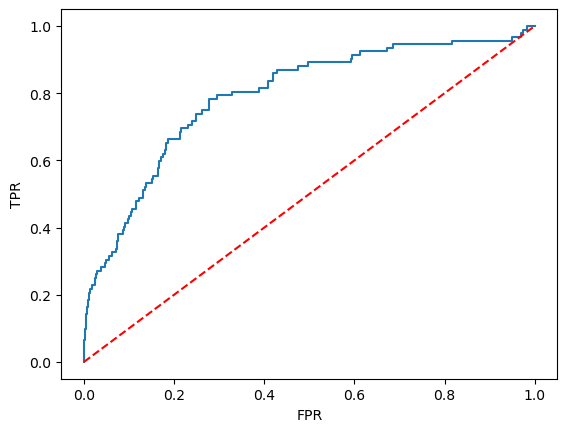

In [75]:
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [76]:
df.columns[2:]

Index(['InscClaimAmtReimbursed_x', 'DeductibleAmtPaid_x', 'Gender',
       'RenalDiseaseIndicator', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       ...
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2',
       'ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3',
       'Race_1.0', 'Race_2.0', 'Race_3.0', 'Race_5.0'],
      dtype='object', length=265)

In [77]:
feats_imps = pd.DataFrame({'Features': df.columns[2:], 'Importance_Model_1': mod.coef_[0]})
feats_imps

,Features,Importance_Model_1
0,InscClaimAmtReimbursed_x,0.654649
1,DeductibleAmtPaid_x,-0.245536
2,Gender,-0.336932
3,RenalDiseaseIndicator,0.389494
4,NoOfMonths_PartACov,0.046242
...,...,...
260,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_C...,-0.023194
261,Race_1.0,-0.005146
262,Race_2.0,-0.061235
263,Race_3.0,0.165739


In [78]:
top_15=feats_imps.sort_values(by='Importance_Model_1',ascending=False)
top_15=top_15.head(15)

In [79]:
top_15.describe()

,Importance_Model_1
count,15.000000
mean,0.451403
std,0.234939
min,0.306126
25%,0.329905
50%,0.334679
75%,0.421392
max,1.172832


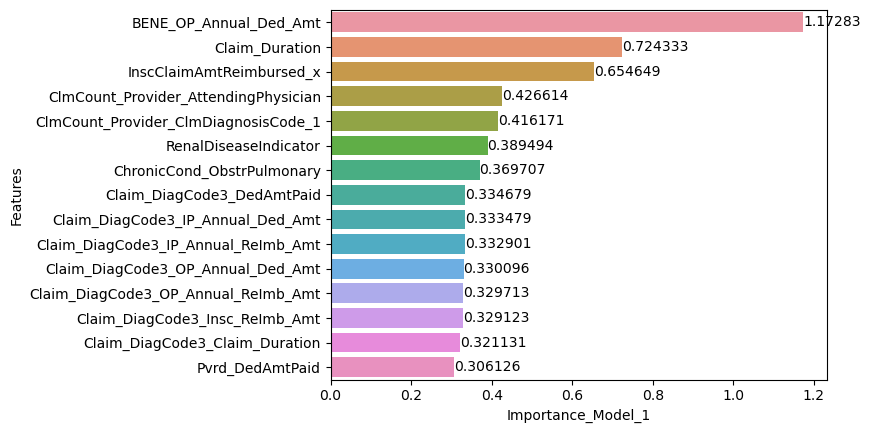

In [80]:

p=sns.barplot(data=top_15,y=top_15['Features'],x=top_15['Importance_Model_1'])
plt.bar_label(p.containers[0])
plt.show()

# XGBoost

In [81]:
import xgboost as xgb

In [82]:
xclf=xgb.XGBClassifier(learning_rate= 0.15, max_depth= 5, n_estimators= 300)
xclf.fit(x_train,y_train)
bn=xclf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,bn))
print('Confusion_matrix:\n',confusion_matrix(y_test,bn))
print('Precision:',precision_score(y_test,bn))

Accuracy: 0.9202392821535393
Confusion_matrix:
 [[906   5]
 [ 75  17]]
Precision: 0.7727272727272727


In [83]:
xclf.feature_importances_

array([9.01430752e-03, 5.69233578e-03, 6.57480629e-03, 9.34548955e-03,
       7.66179012e-03, 1.13489255e-02, 5.84597560e-03, 7.05732219e-03,
       4.24926775e-03, 6.48892345e-03, 6.46036444e-03, 4.55013011e-03,
       6.50285324e-03, 6.14276901e-03, 5.70562435e-03, 5.25735598e-03,
       4.47327457e-03, 1.00000501e-02, 3.54799582e-03, 6.28373725e-03,
       4.11749631e-03, 9.56333801e-03, 6.07897015e-03, 4.67519835e-03,
       2.57581938e-03, 9.31313261e-03, 7.52098439e-03, 6.87423488e-03,
       5.23491530e-03, 5.19157248e-03, 5.85427601e-03, 3.98907624e-03,
       3.68802855e-03, 4.46352549e-03, 6.73412206e-03, 6.37244387e-03,
       1.03937192e-02, 5.45490580e-03, 5.74777136e-03, 5.60919428e-03,
       8.94478988e-03, 6.82652369e-03, 5.10386657e-03, 5.92583185e-03,
       7.78918015e-03, 6.77642040e-03, 7.32553378e-03, 6.44323975e-03,
       5.45086991e-03, 4.45132330e-03, 3.55092739e-03, 0.00000000e+00,
       1.59389782e-03, 2.37238687e-03, 1.84264500e-03, 1.28167877e-02,
      

In [84]:
imp_columns = pd.DataFrame({'Features': df.columns[2:], 'Importance_Model_1': xclf.feature_importances_})
imp_columns

,Features,Importance_Model_1
0,InscClaimAmtReimbursed_x,0.009014
1,DeductibleAmtPaid_x,0.005692
2,Gender,0.006575
3,RenalDiseaseIndicator,0.009345
4,NoOfMonths_PartACov,0.007662
...,...,...
260,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_C...,0.000000
261,Race_1.0,0.010834
262,Race_2.0,0.005308
263,Race_3.0,0.006650


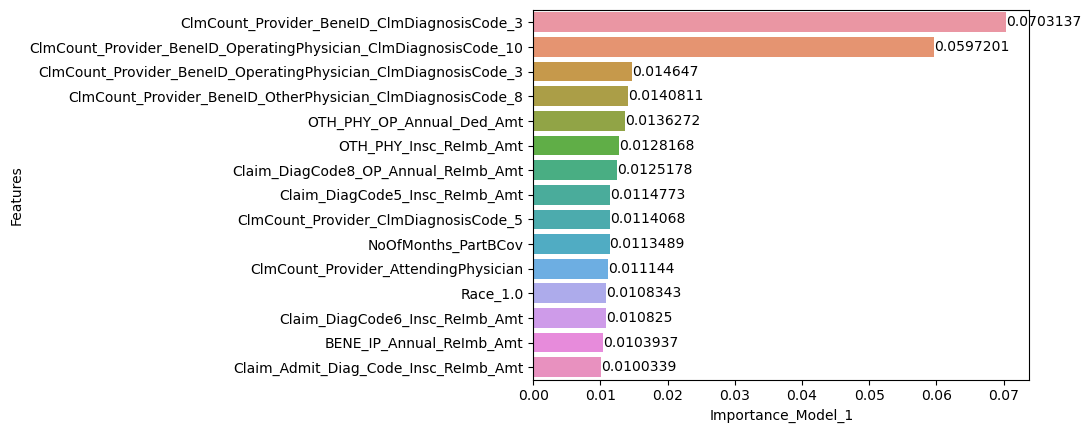

In [85]:
top_15=imp_columns.sort_values(by='Importance_Model_1',ascending=False).head(15)

p=sns.barplot(data=top_15,y=top_15['Features'],x=top_15['Importance_Model_1'])
plt.bar_label(p.containers[0])
plt.show()

# Data Preprocessing for Test Dataset

In [86]:
test_data=pd.read_csv('C:\\Users\\rohit.desai.ACS\OneDrive - Innova Solutions\Documents\Fraud\Test_datasets\Test-1542969243754.csv')
test_bendata=pd.read_csv('C:\\Users\\rohit.desai.ACS\OneDrive - Innova Solutions\Documents\Fraud\Test_datasets\Test_Beneficiarydata-1542969243754.csv')
test_inpdata=pd.read_csv('C:\\Users\\rohit.desai.ACS\OneDrive - Innova Solutions\Documents\Fraud\Test_datasets\Test_Inpatientdata-1542969243754.csv')
test_outpdata=pd.read_csv('C:\\Users\\rohit.desai.ACS\OneDrive - Innova Solutions\Documents\Fraud\Test_datasets\Test_Outpatientdata-1542969243754.csv')

In [87]:
df_t = test_data.merge(test_outpdata, how = 'left', on = 'Provider')
df_t = df_t.merge(test_inpdata, how = 'left', on = ['Provider', 'BeneID', 'ClaimID'])
df_t = df_t.merge(test_bendata, how = 'left', on = 'BeneID')

df_t

,Provider,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100.0,PHY418314,PHY418314,PHY413853,514,...,2.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,1310.0,590.0
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40.0,PHY399539,PHY421140,NaN,7840,...,1.0,1.0,1.0,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0
2,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70.0,PHY352340,NaN,NaN,V4581,...,1.0,1.0,1.0,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0
3,PRV51002,BENE13915,CLM500906,2009-08-01,2009-08-01,100.0,PHY366184,NaN,NaN,42789,...,1.0,1.0,1.0,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0
4,PRV51002,BENE14575,CLM272820,2009-03-29,2009-03-29,400.0,PHY401762,NaN,PHY330212,1532,...,2.0,1.0,1.0,1.0,2.0,1.0,8000.0,13136.0,1520.0,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125930,PRV57750,BENE142702,CLM672301,2009-11-08,2009-11-09,1300.0,PHY323525,NaN,NaN,7222,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,2300.0,60.0
125931,PRV57750,BENE143805,CLM603938,2009-09-28,2009-09-28,10.0,PHY374125,NaN,NaN,4415,...,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,2970.0,760.0
125932,PRV57750,BENE146568,CLM236733,2009-03-09,2009-03-09,200.0,PHY323525,NaN,NaN,V1301,...,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,200.0,60.0
125933,PRV57750,BENE148715,CLM624293,2009-10-10,2009-10-12,2300.0,PHY323525,PHY323525,NaN,2720,...,2.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,5640.0,830.0


In [88]:
df_t=df_t[~df_t['BeneID'].isna()]
df_t

,Provider,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100.0,PHY418314,PHY418314,PHY413853,514,...,2.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,1310.0,590.0
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40.0,PHY399539,PHY421140,NaN,7840,...,1.0,1.0,1.0,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0
2,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70.0,PHY352340,NaN,NaN,V4581,...,1.0,1.0,1.0,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0
3,PRV51002,BENE13915,CLM500906,2009-08-01,2009-08-01,100.0,PHY366184,NaN,NaN,42789,...,1.0,1.0,1.0,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0
4,PRV51002,BENE14575,CLM272820,2009-03-29,2009-03-29,400.0,PHY401762,NaN,PHY330212,1532,...,2.0,1.0,1.0,1.0,2.0,1.0,8000.0,13136.0,1520.0,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125930,PRV57750,BENE142702,CLM672301,2009-11-08,2009-11-09,1300.0,PHY323525,NaN,NaN,7222,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,2300.0,60.0
125931,PRV57750,BENE143805,CLM603938,2009-09-28,2009-09-28,10.0,PHY374125,NaN,NaN,4415,...,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,2970.0,760.0
125932,PRV57750,BENE146568,CLM236733,2009-03-09,2009-03-09,200.0,PHY323525,NaN,NaN,V1301,...,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,200.0,60.0
125933,PRV57750,BENE148715,CLM624293,2009-10-10,2009-10-12,2300.0,PHY323525,PHY323525,NaN,2720,...,2.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,5640.0,830.0


In [89]:
df_t=df_t.drop(['ClaimStartDt_y','ClaimEndDt_y','InscClaimAmtReimbursed_y','AttendingPhysician_y','OperatingPhysician_y','OtherPhysician_y','ClmAdmitDiagnosisCode_y','DeductibleAmtPaid_y','ClmDiagnosisCode_1_y','ClmDiagnosisCode_2_y','ClmDiagnosisCode_3_y','ClmDiagnosisCode_4_y','ClmDiagnosisCode_5_y','ClmDiagnosisCode_6_y','ClmDiagnosisCode_7_y','ClmDiagnosisCode_8_y','ClmDiagnosisCode_9_y','ClmDiagnosisCode_10_y','ClmProcedureCode_1_y','ClmProcedureCode_2_y','ClmProcedureCode_3_y','ClmProcedureCode_4_y','ClmProcedureCode_5_y','ClmProcedureCode_6_y','AdmissionDt','DischargeDt','DeductibleAmtPaid_y','DiagnosisGroupCode'],axis=1)
df_t

,Provider,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100.0,PHY418314,PHY418314,PHY413853,514,...,2.0,1.0,2.0,2.0,2.0,2.0,0.0,0.0,1310.0,590.0
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40.0,PHY399539,PHY421140,NaN,7840,...,1.0,1.0,1.0,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0
2,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70.0,PHY352340,NaN,NaN,V4581,...,1.0,1.0,1.0,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0
3,PRV51002,BENE13915,CLM500906,2009-08-01,2009-08-01,100.0,PHY366184,NaN,NaN,42789,...,1.0,1.0,1.0,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0
4,PRV51002,BENE14575,CLM272820,2009-03-29,2009-03-29,400.0,PHY401762,NaN,PHY330212,1532,...,2.0,1.0,1.0,1.0,2.0,1.0,8000.0,13136.0,1520.0,730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125930,PRV57750,BENE142702,CLM672301,2009-11-08,2009-11-09,1300.0,PHY323525,NaN,NaN,7222,...,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,2300.0,60.0
125931,PRV57750,BENE143805,CLM603938,2009-09-28,2009-09-28,10.0,PHY374125,NaN,NaN,4415,...,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,2970.0,760.0
125932,PRV57750,BENE146568,CLM236733,2009-03-09,2009-03-09,200.0,PHY323525,NaN,NaN,V1301,...,1.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,200.0,60.0
125933,PRV57750,BENE148715,CLM624293,2009-10-10,2009-10-12,2300.0,PHY323525,PHY323525,NaN,2720,...,2.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,5640.0,830.0


In [90]:
df_t[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']]=df_t[['ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x', 'ClmDiagnosisCode_6_x', 'ClmDiagnosisCode_7_x', 'ClmDiagnosisCode_8_x', 'ClmDiagnosisCode_9_x', 'ClmDiagnosisCode_10_x']].replace(np.nan,0)
df_t[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x','ClmProcedureCode_6_x']]=df_t[['ClmProcedureCode_1_x', 'ClmProcedureCode_2_x', 'ClmProcedureCode_3_x', 'ClmProcedureCode_4_x', 'ClmProcedureCode_5_x','ClmProcedureCode_6_x']].replace(np.nan,0)
#df_t['DOD']=df_t['DOD'].replace(np.nan,'NA')
df_t['ClmAdmitDiagnosisCode_x']=df_t['ClmAdmitDiagnosisCode_x'].replace(np.nan,0)
df_t[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']]=df_t[['AttendingPhysician_x', 'OperatingPhysician_x', 'OtherPhysician_x']].replace(np.nan,'NA')


In [91]:
df_t['DOB']=pd.to_datetime(df_t['DOB'],format='%Y-%m-%d')
df_t['DOD']=pd.to_datetime(df_t['DOD'],format='%Y-%m-%d')
df_t['DOD'].fillna(df_t['DOD'].max(),inplace=True)
df_t['ClaimStartDt_x']=pd.to_datetime(df_t['ClaimStartDt_x'],format='%Y-%m-%d')
df_t['ClaimEndDt_x']=pd.to_datetime(df_t['ClaimEndDt_x'],format='%Y-%m-%d')
df_t['Claim_Duration']=(df_t['ClaimEndDt_x']-df_t['ClaimStartDt_x']).dt.days
df_t['B_Age']=round(((df_t['DOD']-df_t['DOB']).dt.days)/365,1)


In [92]:
# df_t is the dataframe, a='ClaimID',x= Attending Physician, y=Operating Physician, z=Other Physician


def AllPhy_totClaims(df_t,a,x,y,z):
    df_t['AttPhy_TC']=df_t.groupby(x)[a].transform('count')
    df_t['OptPhy_TC']=df_t.groupby(y)[a].transform('count')
    df_t['OthPhy_TC']=df_t.groupby(z)[a].transform('count')
    df_t['AttPhy_TC'].fillna(0,inplace=True)
    df_t['OptPhy_TC'].fillna(0,inplace=True)
    df_t['OthPhy_TC'].fillna(0,inplace=True)
    df_t['AllPhy_totClaims'] = df_t['AttPhy_TC']+df_t['OptPhy_TC']+df_t['OthPhy_TC']
    df_t.drop(['AttPhy_TC','OptPhy_TC','OthPhy_TC'],axis=1,inplace=True)
    return df_t


AllPhy_totClaims(df_t,'ClaimID','AttendingPhysician_x','OperatingPhysician_x','OtherPhysician_x')

,Provider,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Claim_Duration,B_Age,AllPhy_totClaims
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100.0,PHY418314,PHY418314,PHY413853,514,...,2.0,2.0,2.0,0.0,0.0,1310.0,590.0,0,75.1,6
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40.0,PHY399539,PHY421140,NA,7840,...,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0,0,88.9,78225
2,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70.0,PHY352340,NA,NA,V4581,...,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0,0,88.9,182468
3,PRV51002,BENE13915,CLM500906,2009-08-01,2009-08-01,100.0,PHY366184,NA,NA,42789,...,2.0,2.0,2.0,22000.0,3204.0,1020.0,910.0,0,88.9,182460
4,PRV51002,BENE14575,CLM272820,2009-03-29,2009-03-29,400.0,PHY401762,NA,PHY330212,1532,...,1.0,2.0,1.0,8000.0,13136.0,1520.0,730.0,0,48.9,104240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125930,PRV57750,BENE142702,CLM672301,2009-11-08,2009-11-09,1300.0,PHY323525,NA,NA,7222,...,2.0,2.0,2.0,0.0,0.0,2300.0,60.0,1,67.0,182521
125931,PRV57750,BENE143805,CLM603938,2009-09-28,2009-09-28,10.0,PHY374125,NA,NA,4415,...,2.0,2.0,2.0,0.0,0.0,2970.0,760.0,0,97.8,182475
125932,PRV57750,BENE146568,CLM236733,2009-03-09,2009-03-09,200.0,PHY323525,NA,NA,V1301,...,2.0,2.0,2.0,0.0,0.0,200.0,60.0,0,49.1,182521
125933,PRV57750,BENE148715,CLM624293,2009-10-10,2009-10-12,2300.0,PHY323525,PHY323525,NA,2720,...,2.0,2.0,2.0,0.0,0.0,5640.0,830.0,2,46.2,78299


In [93]:
#Provider and all physicians interaction

 

#df_t is dataframe, a=Provider, x=Attending Physician, y=Operating Physician, z= Other Physician

 

def Prvd_AllPhy(df_t,a,x,y,z):
    df_t['Prvd_AttPhy']=df_t.groupby(a)[x].transform('count')
    df_t['Prvd_OptPhy']=df_t.groupby(a)[y].transform('count')
    df_t['Prvd_OthPhy']=df_t.groupby(a)[z].transform('count')
    df_t['Prvd_AllPhy']=df_t['Prvd_AttPhy']+df_t['Prvd_OptPhy']+df_t['Prvd_OthPhy']
    df_t.drop(['Prvd_AttPhy','Prvd_OptPhy','Prvd_OthPhy'],axis=1,inplace=True)
    return df_t

 


Prvd_AllPhy(df_t,'Provider','AttendingPhysician_x','OperatingPhysician_x','OtherPhysician_x')
    
    
# Unique claim diagnosis used by providers


#df_t is dataframe, a=provider, x= claimadmitdiagnosiscode,

def Pvrd_CADC(df_t,a,x):
    df_t['Pvrd_CADC']=df_t.groupby(a)[x].transform('nunique')
    return df_t


Pvrd_CADC(df_t,'Provider','ClmAdmitDiagnosisCode_x')


#Sum of Insc Claim Re-Imb Amount for a Provider

#df_t is dataframe, a= provider,x=Insurance claim amt reinmbursed

def Pvrd_InsClnReimAmt(df_t,a,x):
    df_t['Pvrd_InsClnReimAmt']=df_t.groupby(a)[x].transform('sum')
    return df_t

Pvrd_InsClnReimAmt(df_t,'Provider','InscClaimAmtReimbursed_x')



df_t['RenalDiseaseIndicator'].replace({0:0,'Y':1},inplace=True)
df_t['RenalDiseaseIndicator']=df_t['RenalDiseaseIndicator'].astype('int')

#renal disease indicator seen by provider
#df_t is dataframe, a= provider,x=renal disease indicator
def Pvrd_RDI(df_t,a,x):
    df_t['Pvrd_RDI']=df_t.groupby(a)[x].transform('sum')
    return df_t

Pvrd_RDI(df_t,'Provider','RenalDiseaseIndicator')



#df_t is dataframe, a= provider,x=deductible amount paid
def Pvrd_DedAmtPaid(df_t,a,x):
    df_t['Pvrd_DedAmtPaid']=df_t.groupby(a)[x].transform('sum')
    return df_t
Pvrd_DedAmtPaid(df_t,'Provider','DeductibleAmtPaid_x')

#df_t is dataframe, a= provider,x= IP annual amt reimbursement
def Pvrd_IPAnAmtReim(df_t,a,x):
    df_t['Pvrd_IPAnAmtReim']=df_t.groupby(a)[x].transform('sum')
    return df_t
Pvrd_IPAnAmtReim(df_t,'Provider','IPAnnualReimbursementAmt')

#df_t is dataframe, a= provider,x= OP annual amt reimbursement
def Pvrd_OPAnAmtReim(df_t,a,x):
    df_t['Pvrd_OPAnAmtReim']=df_t.groupby(a)[x].transform('sum')
    return df_t
Pvrd_OPAnAmtReim(df_t,'Provider','OPAnnualReimbursementAmt')


#df_t is dataframe, a= provider,x= OP annual deductible amt 
def Pvrd_OPAnDedAmt(df_t,a,x):
    df_t['Pvrd_OPAnDedAmt']=df_t.groupby(a)[x].transform('sum')
    return df_t
Pvrd_OPAnDedAmt(df_t,'Provider','OPAnnualDeductibleAmt')

#df_t is dataframe, a= provider,x= IP annual deductible amt 
def Pvrd_IPAnDedAmt(df_t,a,x):
    df_t['Pvrd_IPAnDedAmt']=df_t.groupby(a)[x].transform('sum')
    return df_t
Pvrd_IPAnDedAmt(df_t,'Provider','IPAnnualDeductibleAmt')



#df_t is dataframe, a= provider,x=Claim duration
def Pvrd_ClmDur(df_t,a,x):
    df_t['Pvrd_ClmDur']=df_t.groupby(a)[x].transform('sum')
    return df_t
Pvrd_ClmDur(df_t,'Provider','Claim_Duration')

,Provider,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OperatingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,...,Prvd_AllPhy,Pvrd_CADC,Pvrd_InsClnReimAmt,Pvrd_RDI,Pvrd_DedAmtPaid,Pvrd_IPAnAmtReim,Pvrd_OPAnAmtReim,Pvrd_OPAnDedAmt,Pvrd_IPAnDedAmt,Pvrd_ClmDur
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100.0,PHY418314,PHY418314,PHY413853,514,...,615,43,53790.0,32,380.0,1062090.0,480740.0,138980.0,112392.0,201
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40.0,PHY399539,PHY421140,NA,7840,...,615,43,53790.0,32,380.0,1062090.0,480740.0,138980.0,112392.0,201
2,PRV51002,BENE13915,CLM348696,2009-05-09,2009-05-09,70.0,PHY352340,NA,NA,V4581,...,615,43,53790.0,32,380.0,1062090.0,480740.0,138980.0,112392.0,201
3,PRV51002,BENE13915,CLM500906,2009-08-01,2009-08-01,100.0,PHY366184,NA,NA,42789,...,615,43,53790.0,32,380.0,1062090.0,480740.0,138980.0,112392.0,201
4,PRV51002,BENE14575,CLM272820,2009-03-29,2009-03-29,400.0,PHY401762,NA,PHY330212,1532,...,615,43,53790.0,32,380.0,1062090.0,480740.0,138980.0,112392.0,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125930,PRV57750,BENE142702,CLM672301,2009-11-08,2009-11-09,1300.0,PHY323525,NA,NA,7222,...,315,20,27020.0,17,230.0,355890.0,259740.0,64360.0,39516.0,109
125931,PRV57750,BENE143805,CLM603938,2009-09-28,2009-09-28,10.0,PHY374125,NA,NA,4415,...,315,20,27020.0,17,230.0,355890.0,259740.0,64360.0,39516.0,109
125932,PRV57750,BENE146568,CLM236733,2009-03-09,2009-03-09,200.0,PHY323525,NA,NA,V1301,...,315,20,27020.0,17,230.0,355890.0,259740.0,64360.0,39516.0,109
125933,PRV57750,BENE148715,CLM624293,2009-10-10,2009-10-12,2300.0,PHY323525,PHY323525,NA,2720,...,315,20,27020.0,17,230.0,355890.0,259740.0,64360.0,39516.0,109


In [94]:
def create_agg_feats(df_t,grp_col, feat_name, operation='sum'):
    feat_1 = feat_name + "_Insc_ReImb_Amt"
    df_t[feat_1] = df_t.groupby(grp_col)['InscClaimAmtReimbursed_x'].transform(operation)
    
    feat_2 = feat_name + "_DedAmtPaid"
    df_t[feat_2] = df_t.groupby(grp_col)['DeductibleAmtPaid_x'].transform(operation)

    feat_3 = feat_name + "_IP_Annual_ReImb_Amt"
    df_t[feat_3] = df_t.groupby(grp_col)['IPAnnualReimbursementAmt'].transform(operation)

    feat_4 = feat_name + "_IP_Annual_Ded_Amt"
    df_t[feat_4] = df_t.groupby(grp_col)['IPAnnualDeductibleAmt'].transform(operation)

    feat_5 = feat_name + "_OP_Annual_ReImb_Amt"
    df_t[feat_5] = df_t.groupby(grp_col)['OPAnnualReimbursementAmt'].transform(operation)

    feat_6 = feat_name + "_OP_Annual_Ded_Amt"
    df_t[feat_6] = df_t.groupby(grp_col)['OPAnnualDeductibleAmt'].transform(operation)
    
    feat_7 = feat_name + "_Claim_Duration"
    df_t[feat_7] = df_t.groupby(grp_col)['Claim_Duration'].transform(operation)


In [95]:
create_agg_feats(df_t,grp_col='BeneID', feat_name="BENE")
create_agg_feats(df_t,grp_col='AttendingPhysician_x', feat_name="ATT_PHY")
create_agg_feats(df_t,grp_col='OperatingPhysician_x', feat_name="OPT_PHY")
create_agg_feats(df_t,grp_col='OtherPhysician_x', feat_name="OTH_PHY")
create_agg_feats(df_t,grp_col='ClmAdmitDiagnosisCode_x', feat_name="Claim_Admit_Diag_Code")


In [96]:
df_t.drop(['ClmProcedureCode_4_x','ClmProcedureCode_5_x','ClmProcedureCode_6_x'],axis=1,inplace=True)
create_agg_feats(df_t,grp_col='ClmDiagnosisCode_1_x', feat_name="Claim_DiagCode1")
create_agg_feats(df_t,grp_col='ClmDiagnosisCode_2_x', feat_name="Claim_DiagCode2")
create_agg_feats(df_t,grp_col='ClmDiagnosisCode_3_x', feat_name="Claim_DiagCode3")
create_agg_feats(df_t,grp_col='ClmDiagnosisCode_4_x', feat_name="Claim_DiagCode4")
create_agg_feats(df_t,grp_col='ClmDiagnosisCode_5_x', feat_name="Claim_DiagCode5")
create_agg_feats(df_t,grp_col='ClmDiagnosisCode_6_x', feat_name="Claim_DiagCode6")
create_agg_feats(df_t,grp_col='ClmDiagnosisCode_7_x', feat_name="Claim_DiagCode7")
create_agg_feats(df_t,grp_col='ClmDiagnosisCode_8_x', feat_name="Claim_DiagCode8")
create_agg_feats(df_t,grp_col='ClmDiagnosisCode_9_x', feat_name="Claim_DiagCode9")
create_agg_feats(df_t,grp_col='ClmDiagnosisCode_10_x', feat_name="Claim_DiagCode10")




create_agg_feats(df_t,grp_col='ClmProcedureCode_1_x', feat_name="Claim_ProcCode1")
create_agg_feats(df_t,grp_col='ClmProcedureCode_2_x', feat_name="Claim_ProcCode2")
create_agg_feats(df_t,grp_col='ClmProcedureCode_3_x', feat_name="Claim_ProcCode3")

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\3192101729.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t[feat_1] = df_t.groupby(grp_col)['InscClaimAmtReimbursed_x'].transform(operation)
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\3192101729.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t[feat_2] = df_t.groupby(grp_col)['DeductibleAmtPaid_x'].transform(operation)
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\3192101729.py:9: PerformanceWarning: DataFrame is highly frag

In [97]:
# PROVIDER <--> other features :: To get claim counts

df_t["ClmCount_Provider"]=df_t.groupby(['Provider'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID"]=df_t.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_AttendingPhysician"]=df_t.groupby(['Provider','AttendingPhysician_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_OtherPhysician"]=df_t.groupby(['Provider','OtherPhysician_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_OperatingPhysician"]=df_t.groupby(['Provider','OperatingPhysician_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmAdmitDiagnosisCode"]=df_t.groupby(['Provider','ClmAdmitDiagnosisCode_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmProcedureCode_1"]=df_t.groupby(['Provider','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmProcedureCode_2"]=df_t.groupby(['Provider','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmProcedureCode_3"]=df_t.groupby(['Provider','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmDiagnosisCode_1"]=df_t.groupby(['Provider','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmDiagnosisCode_2"]=df_t.groupby(['Provider','ClmDiagnosisCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmDiagnosisCode_3"]=df_t.groupby(['Provider','ClmDiagnosisCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmDiagnosisCode_4"]=df_t.groupby(['Provider','ClmDiagnosisCode_4_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmDiagnosisCode_5"]=df_t.groupby(['Provider','ClmDiagnosisCode_5_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmDiagnosisCode_6"]=df_t.groupby(['Provider','ClmDiagnosisCode_6_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmDiagnosisCode_7"]=df_t.groupby(['Provider','ClmDiagnosisCode_7_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmDiagnosisCode_8"]=df_t.groupby(['Provider','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmDiagnosisCode_9"]=df_t.groupby(['Provider','ClmDiagnosisCode_9_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_ClmDiagnosisCode_10"]=df_t.groupby(['Provider','ClmDiagnosisCode_10_x'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')

# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')



# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> PROCEDURE CODES :: To get claim counts
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')



# PROVIDER <--> BENE <--> ATTENDING PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_2"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_3"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_4"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_4_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_5"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_5_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_6"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_6_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_7"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_7_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_8"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_9"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_9_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_10"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_10_x'])['ClaimID'].transform('count')



# PROVIDER <--> BENE <--> OPERATING PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_1"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_2"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_3"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_4"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_4_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_5"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_5_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_6"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_6_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_7"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_7_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_8"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_9"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_9_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_10"]=df_t.groupby(['Provider','BeneID','OperatingPhysician_x','ClmDiagnosisCode_10_x'])['ClaimID'].transform('count')




# PROVIDER <--> BENE <--> OTHER PHYSICIAN <--> DIAGNOSIS CODES :: To get claim counts
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_1"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_2"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_3"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_4"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_4_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_5"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_5_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_6"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_6_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_7"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_7_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_8"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_9"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_9_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_10"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_10_x'])['ClaimID'].transform('count')



# PROVIDER <--> BENE <--> PROCEDURE CODES :: To get claim counts
df_t["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmProcedureCode_3_x'])['ClaimID'].transform('count')



# PROVIDER <--> BENE <--> DIAGNOSIS CODES :: To get claim counts
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_2"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_4"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_4_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_5"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_5_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_6"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_6_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_7"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_7_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_8"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_9"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_9_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_10"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_10_x'])['ClaimID'].transform('count')




# PROVIDER <--> BENE <--> DIAGNOSIS CODES <--> PROCEDURE CODES :: To get claim counts
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_1_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_1_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_1_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_2_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_2_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_2_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_2_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_3_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_3_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_3_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_3_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_4_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_4_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_4_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_4_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_5_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_5_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_5_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_6_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_6_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_6_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_7_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_7_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_7_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_7_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_8_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_8_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_8_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_9_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_9_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_9_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_10_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_10_x','ClmProcedureCode_2_x'])['ClaimID'].transform('count')
df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_10_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')



columns_to_remove=['BeneID', 'ClaimID', 'ClaimStartDt_x','ClaimEndDt_x','AttendingPhysician_x','OperatingPhysician_x', 'OtherPhysician_x', 'ClmAdmitDiagnosisCode_x','ClmDiagnosisCode_1_x','ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x', 'ClmDiagnosisCode_5_x','ClmDiagnosisCode_6_x','ClmDiagnosisCode_7_x','ClmDiagnosisCode_8_x','ClmDiagnosisCode_9_x','ClmDiagnosisCode_10_x','ClmProcedureCode_1_x','ClmProcedureCode_2_x','ClmProcedureCode_3_x','DOB','DOD','State','County']
df_t.drop(columns_to_remove,axis=1,inplace=True)

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider"]=df_t.groupby(['Provider'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID"]=df_t.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:5: PerformanceWarning: DataFrame

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_2"]=df_t.groupby(['Provider','BeneID

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_8"]=df_t.groupby(['Provider','BeneID','AttendingPhysician_x','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_9"]=df_t.groupby(['Provider','BeneID

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_4"]=df_t.groupby(['Provider','BeneID','OtherPhysician_x','ClmDiagnosisCode_4_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_5"]=df_t.groupby(['Provider','BeneID','OtherPhys

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_7"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_7_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:100: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_8"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_8_x'])['ClaimID'].transform('count')
C:\

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:120: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_1"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_5_x','ClmProcedureCode_1_x'])['ClaimID'].transform('count')
C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_5_ClmProcedureCode_2"]=df_t.groupby(['Provider','Bene

C:\Users\rohit.desai.ACS\AppData\Local\Temp\ipykernel_10456\1241058884.py:137: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t["ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3"]=df_t.groupby(['Provider','BeneID','ClmDiagnosisCode_10_x','ClmProcedureCode_3_x'])['ClaimID'].transform('count')


In [98]:
df_t['Gender'].replace({2.0:0,1.0:1},inplace=True)
df_t['ChronicCond_Alzheimer'].replace(2.0,0,inplace=True)
df_t['ChronicCond_Heartfailure'].replace(2.0,0,inplace=True)
df_t['ChronicCond_KidneyDisease'].replace(2.0,0,inplace=True)
df_t['ChronicCond_Cancer'].replace(2.0,0,inplace=True)
df_t['ChronicCond_ObstrPulmonary'].replace(2.0,0,inplace=True)
df_t['ChronicCond_Depression'].replace(2.0,0,inplace=True)
df_t['ChronicCond_Diabetes'].replace(2.0,0,inplace=True)
df_t['ChronicCond_IschemicHeart'].replace(2.0,0,inplace=True)
df_t['ChronicCond_Osteoporasis'].replace(2.0,0,inplace=True)
df_t['ChronicCond_rheumatoidarthritis'].replace(2.0,0,inplace=True)
df_t['ChronicCond_stroke'].replace(2.0,0,inplace=True)


df_t=pd.get_dummies(df_t,columns=['Race'])
df_t = df_t.groupby(['Provider'],as_index=False).agg('sum')

In [99]:
df_t

,Provider,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3,Race_1.0,Race_2.0,Race_3.0,Race_5.0
0,PRV51002,53790.0,380.0,71.0,32,2424.0,2460.0,79.0,108.0,72.0,...,293,293,293,293,293,293,169.0,30.0,2.0,4.0
1,PRV51006,30720.0,0.0,43.0,10,1224.0,1224.0,35.0,69.0,50.0,...,186,186,186,202,202,202,76.0,26.0,0.0,0.0
2,PRV51009,12230.0,170.0,16.0,11,444.0,444.0,7.0,16.0,18.0,...,111,111,111,111,111,111,31.0,6.0,0.0,0.0
3,PRV51010,8580.0,0.0,19.0,4,372.0,372.0,17.0,17.0,15.0,...,60,60,60,60,60,60,32.0,0.0,0.0,0.0
4,PRV51018,61620.0,670.0,66.0,41,2232.0,2276.0,73.0,109.0,93.0,...,304,304,304,312,312,312,145.0,45.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,PRV57713,860.0,0.0,7.0,2,132.0,132.0,6.0,7.0,5.0,...,13,13,13,13,13,13,8.0,0.0,2.0,1.0
1255,PRV57726,1590.0,0.0,5.0,0,96.0,96.0,4.0,5.0,3.0,...,8,8,8,8,8,8,6.0,2.0,0.0,0.0
1256,PRV57745,510.0,0.0,1.0,1,24.0,24.0,1.0,2.0,2.0,...,2,2,2,2,2,2,2.0,0.0,0.0,0.0
1257,PRV57749,9980.0,370.0,18.0,9,588.0,564.0,18.0,22.0,20.0,...,57,57,57,57,57,57,32.0,10.0,5.0,2.0


In [100]:
X=df_t.iloc[:,1:]

In [101]:
X

,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3,Race_1.0,Race_2.0,Race_3.0,Race_5.0
0,53790.0,380.0,71.0,32,2424.0,2460.0,79.0,108.0,72.0,25.0,...,293,293,293,293,293,293,169.0,30.0,2.0,4.0
1,30720.0,0.0,43.0,10,1224.0,1224.0,35.0,69.0,50.0,15.0,...,186,186,186,202,202,202,76.0,26.0,0.0,0.0
2,12230.0,170.0,16.0,11,444.0,444.0,7.0,16.0,18.0,1.0,...,111,111,111,111,111,111,31.0,6.0,0.0,0.0
3,8580.0,0.0,19.0,4,372.0,372.0,17.0,17.0,15.0,5.0,...,60,60,60,60,60,60,32.0,0.0,0.0,0.0
4,61620.0,670.0,66.0,41,2232.0,2276.0,73.0,109.0,93.0,25.0,...,304,304,304,312,312,312,145.0,45.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,860.0,0.0,7.0,2,132.0,132.0,6.0,7.0,5.0,1.0,...,13,13,13,13,13,13,8.0,0.0,2.0,1.0
1255,1590.0,0.0,5.0,0,96.0,96.0,4.0,5.0,3.0,1.0,...,8,8,8,8,8,8,6.0,2.0,0.0,0.0
1256,510.0,0.0,1.0,1,24.0,24.0,1.0,2.0,2.0,1.0,...,2,2,2,2,2,2,2.0,0.0,0.0,0.0
1257,9980.0,370.0,18.0,9,588.0,564.0,18.0,22.0,20.0,6.0,...,57,57,57,57,57,57,32.0,10.0,5.0,2.0


In [102]:
X_t=stdscl.fit_transform(X)
X_t

array([[ 0.33773249,  0.13979914,  0.26596546, ...,  0.76018877,
        -0.11244434,  0.25903332],
       [ 0.02509107, -0.38611166,  0.00642016, ...,  0.60854248,
        -0.3294059 , -0.26068453],
       [-0.22548283, -0.15083577, -0.24385566, ..., -0.14968898,
        -0.3294059 , -0.26068453],
       ...,
       [-0.38431063, -0.38611166, -0.38289778, ..., -0.37715842,
        -0.3294059 , -0.26068453],
       [-0.25597451,  0.12595939, -0.22531671, ...,  0.00195731,
         0.21299801, -0.0008256 ],
       [-0.02505081, -0.06779723,  0.04349806, ...,  0.22942675,
         0.42995957,  0.77875118]])

In [103]:
X_t.shape

(1259, 265)

In [104]:
fraud=xclf.predict(X_t)
fraud

array([0, 1, 0, ..., 0, 0, 0])

In [105]:
fraud_prob=xclf.predict_proba(X_t)
fraud_prob

array([[0.8725699 , 0.12743007],
       [0.31716126, 0.68283874],
       [0.96177846, 0.03822153],
       ...,
       [0.9825967 , 0.01740329],
       [0.70726347, 0.29273653],
       [0.9860945 , 0.0139055 ]], dtype=float32)

In [106]:
fraud_prob[:,1]

array([0.12743007, 0.68283874, 0.03822153, ..., 0.01740329, 0.29273653,
       0.0139055 ], dtype=float32)

In [107]:
print('Max:',fraud_prob[:,1].max(),'\n','Min:',fraud_prob[:,1].min())

Max: 0.99476 
 Min: 0.00044989295


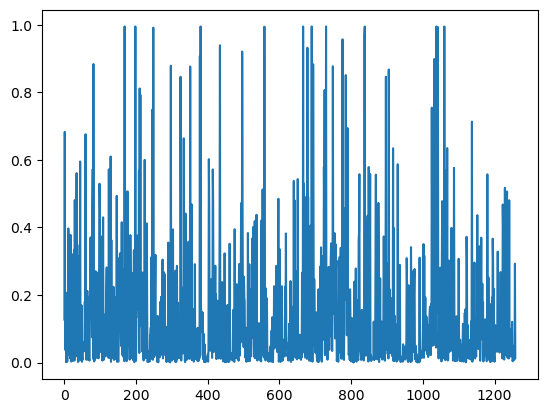

In [108]:
plt.plot(fraud_prob[:,1])

In [109]:
df_t['Fraud_Probability']=fraud_prob[:,1]
df_t

,Provider,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3,Race_1.0,Race_2.0,Race_3.0,Race_5.0,Fraud_Probability
0,PRV51002,53790.0,380.0,71.0,32,2424.0,2460.0,79.0,108.0,72.0,...,293,293,293,293,293,169.0,30.0,2.0,4.0,0.127430
1,PRV51006,30720.0,0.0,43.0,10,1224.0,1224.0,35.0,69.0,50.0,...,186,186,202,202,202,76.0,26.0,0.0,0.0,0.682839
2,PRV51009,12230.0,170.0,16.0,11,444.0,444.0,7.0,16.0,18.0,...,111,111,111,111,111,31.0,6.0,0.0,0.0,0.038222
3,PRV51010,8580.0,0.0,19.0,4,372.0,372.0,17.0,17.0,15.0,...,60,60,60,60,60,32.0,0.0,0.0,0.0,0.150219
4,PRV51018,61620.0,670.0,66.0,41,2232.0,2276.0,73.0,109.0,93.0,...,304,304,312,312,312,145.0,45.0,0.0,0.0,0.145978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,PRV57713,860.0,0.0,7.0,2,132.0,132.0,6.0,7.0,5.0,...,13,13,13,13,13,8.0,0.0,2.0,1.0,0.049760
1255,PRV57726,1590.0,0.0,5.0,0,96.0,96.0,4.0,5.0,3.0,...,8,8,8,8,8,6.0,2.0,0.0,0.0,0.007758
1256,PRV57745,510.0,0.0,1.0,1,24.0,24.0,1.0,2.0,2.0,...,2,2,2,2,2,2.0,0.0,0.0,0.0,0.017403
1257,PRV57749,9980.0,370.0,18.0,9,588.0,564.0,18.0,22.0,20.0,...,57,57,57,57,57,32.0,10.0,5.0,2.0,0.292737


In [110]:
def Fraud_Potential(a):
    if (a<0.1):
        return('Negligible')
    elif (a>0.1)&(a<0.4):
        return('Low Potential')
    elif(a>0.4)&(a<0.6):
        return('Mediocre Potential')
    elif(a>0.6)&(a<0.8):
        return('High Potential')
    else:
        return('Very High Potential')

In [111]:
df_t['Fraud_Potential']=df_t['Fraud_Probability'].apply(Fraud_Potential)

In [112]:
df_t

,Provider,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,...,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3,Race_1.0,Race_2.0,Race_3.0,Race_5.0,Fraud_Probability,Fraud_Potential
0,PRV51002,53790.0,380.0,71.0,32,2424.0,2460.0,79.0,108.0,72.0,...,293,293,293,293,169.0,30.0,2.0,4.0,0.127430,Low Potential
1,PRV51006,30720.0,0.0,43.0,10,1224.0,1224.0,35.0,69.0,50.0,...,186,202,202,202,76.0,26.0,0.0,0.0,0.682839,High Potential
2,PRV51009,12230.0,170.0,16.0,11,444.0,444.0,7.0,16.0,18.0,...,111,111,111,111,31.0,6.0,0.0,0.0,0.038222,Negligible
3,PRV51010,8580.0,0.0,19.0,4,372.0,372.0,17.0,17.0,15.0,...,60,60,60,60,32.0,0.0,0.0,0.0,0.150219,Low Potential
4,PRV51018,61620.0,670.0,66.0,41,2232.0,2276.0,73.0,109.0,93.0,...,304,312,312,312,145.0,45.0,0.0,0.0,0.145978,Low Potential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,PRV57713,860.0,0.0,7.0,2,132.0,132.0,6.0,7.0,5.0,...,13,13,13,13,8.0,0.0,2.0,1.0,0.049760,Negligible
1255,PRV57726,1590.0,0.0,5.0,0,96.0,96.0,4.0,5.0,3.0,...,8,8,8,8,6.0,2.0,0.0,0.0,0.007758,Negligible
1256,PRV57745,510.0,0.0,1.0,1,24.0,24.0,1.0,2.0,2.0,...,2,2,2,2,2.0,0.0,0.0,0.0,0.017403,Negligible
1257,PRV57749,9980.0,370.0,18.0,9,588.0,564.0,18.0,22.0,20.0,...,57,57,57,57,32.0,10.0,5.0,2.0,0.292737,Low Potential


In [113]:
df_t['Fraud_Potential'].value_counts()

Negligible             730
Low Potential          425
Mediocre Potential      58
Very High Potential     30
High Potential          16
Name: Fraud_Potential, dtype: int64